In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def coins(Matrix):
    if Matrix == "H":
        coin = np.array([[1/np.sqrt(2) , 1/np.sqrt(2)],[1/np.sqrt(2) , -1/np.sqrt(2)]])
    elif Matrix == "X":
        coin = np.array([0,1],[1,0])
    return coin

def coins_mod(phi,gamma,epsilon):
    ry = np.array([[np.cos(phi/2), -np.sin(np.cos(phi/2))],[np.sin(phi/2),np.cos(phi/2)]])
    p = np.array([[np.exp(-1j*((gamma-epsilon)/2)),0],[0,np.exp(1j*((gamma-epsilon)/2))]])
    return ry @ p

In [57]:
def init_state(N,Pos,Amp,CoinState):
    initstate = np.zeros((N,1))
    for Node in range(0,Pos.size):
        initstate[Pos[Node],0] = Amp[Node]
    g = np.kron(CoinState,initstate)
    return g

In [58]:
def init_cond(init,state0,state1):
    if init == "0":
        psi0 = np.array([[1],[0]])
    if init == "1":
        psi0 = np.array([[0],[1]])
    if init == "01":
        psi0 = np.array([[1/np.sqrt(2)],[(-1*1j)/np.sqrt(2)]])
    return psi0

In [59]:
def walk_op(N,state0,state1):
    c00= np.outer(state0,state0)
    c01= np.outer(state0,state1)
    c10= np.outer(state1,state0)
    c11= np.outer(state1,state1)
    ShiftPlus = np.roll(np.eye(N),1,axis=0)
    ShiftMinus = np.roll(np.eye(N),-1,axis=0)
    Shift = np.kron(c00,ShiftPlus) + np.kron(c11,ShiftMinus) 
    return Shift

In [60]:
def CU_op(coin, shift,N):
    U = shift.dot(np.kron(coin,np.eye(N)))
    return U

In [61]:
def final_state(U,psi0,steps):
    for t in range(0,steps):
        psi0=U.dot(psi0)
    # print(f"psi0: {psi0}")
    return psi0

In [65]:
def prob_vec(psiN,N):
    probs = np.zeros((N,1))
    # print(f"psiN: {psiN}")
    for x in range(N):
        probs[x]=psiN[x]*np.conjugate(psiN[x]) + psiN[N+x]*np.conjugate(psiN[N+x]) #duvida aqui
    # print(f"probs:{probs}")
    return probs

In [66]:
def cqwalk(N,Steps,state0,state1,initcond,coin):
    P = int((N+1)/2)
    coin = coin
    shift= walk_op(N,state0,state1)
    U = CU_op(coin,shift,N)
    coinstate = initcond
    amp = np.array([1])
    psi0 = init_state(N,np.array([P]),amp,coinstate)
    psiN = final_state(U,psi0,Steps)
    probvec = prob_vec(psiN,N)
    return probvec

C:\Users\jaime\AppData\Local\Temp\ipykernel_15540\905974600.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  probs[x]=psiN[x]*np.conjugate(psiN[x]) + psiN[N+x]*np.conjugate(psiN[N+x]) #duvida aqui


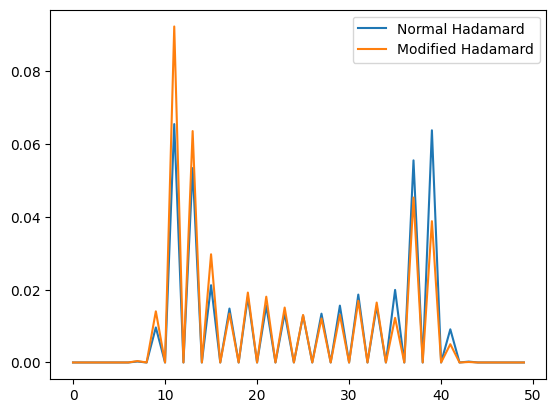

In [85]:
N = 50
steps = 20
state0 = np.array([1,0])
state1 = np.array([0,1])

init = '01'
initcond = init_cond(init,state0,state1)

# coin = coins("H")
coin = coins_mod(np.pi/2,np.pi,0)

qw = cqwalk(N,steps,state0,state1,initcond,coin)


init2 = '01'
initcond2 = init_cond(init2,state0,state1)

# coin = coins("H")
coin2 = coins_mod(np.pi/2,np.pi,0.5)

# print(f"Coin: {coin} \n coin2: {coin2}")

qw2 = cqwalk(N,steps,state0,state1,initcond2,coin2)
# print(f"qw1: {qw}\n qw2: {qw2}")
i=0

plt.plot(qw,label=f"Normal Hadamard")
plt.plot(qw2,label=f"Modified Hadamard")

plt.legend()
plt.show()